# **CS675 – Introduction to Data Science (CRN: 73405)**


##**RAJAT TIWARI**

##**U01954832**

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##**Reading the dataset**

In [58]:
# Read the data
df = pd.read_csv('bank-additional-full.csv', sep=';')

##**Converting categorical variables to numerical values using label encoder**

In [59]:
# Convert categorical variables to numerical
le = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day', 'poutcome', 'y']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

##**Seperating features and target variables & Standardizing the features**

In [60]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##**Splitting the dataset**

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##**Making an empty list "results"**

In [62]:
# Initialize results list to store metrics for all models
results = []

##**Training and evaluating a Logistic Regression model**

In [63]:
# 1. Logistic Regression
print("\nTraining Logistic Regression...")
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)[:, 1]

# Calculate metrics
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, lr_pred),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1': f1_score(y_test, lr_pred)
}
results.append(lr_metrics)

# Print classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))


Training Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.59      0.21      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



## **Plotting a confusion matrix to visualize the performance of the Logistic Regression model**

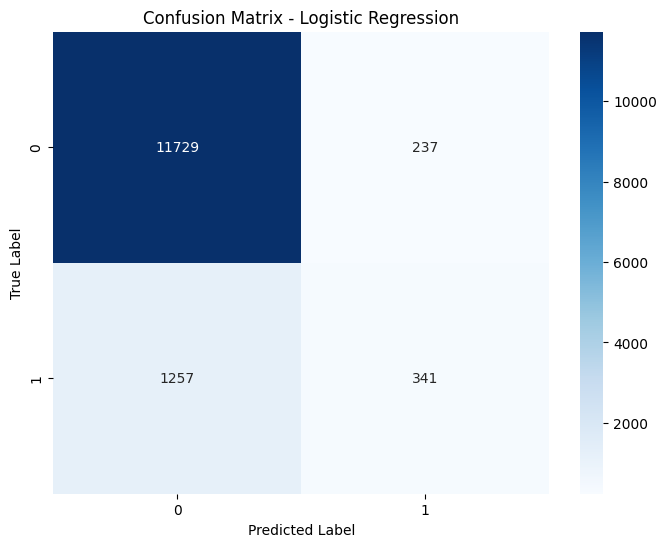

In [64]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**Now plotting the ROC curve to evaluate the performance of the Logistic Regression model**

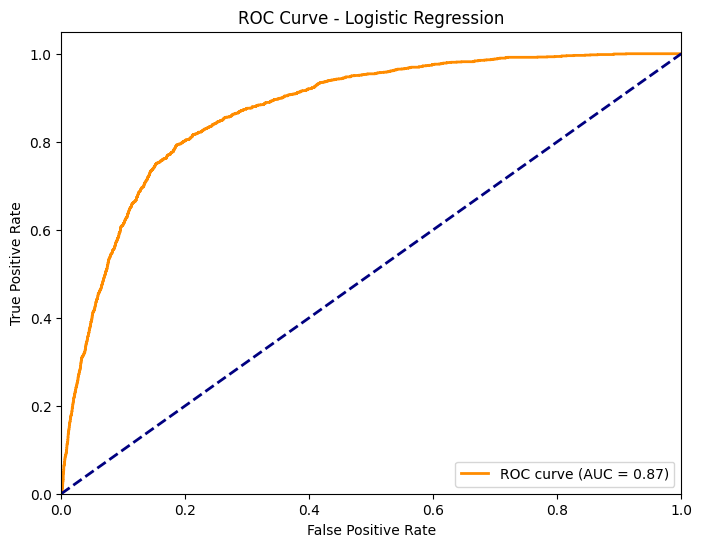

In [65]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

##**Training and evaluating a Naive Bayes Classifier**

In [66]:
# 2. Naive Bayes
print("\nTraining Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)[:, 1]

nb_metrics = {
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, nb_pred),
    'Precision': precision_score(y_test, nb_pred),
    'Recall': recall_score(y_test, nb_pred),
    'F1': f1_score(y_test, nb_pred)
}
results.append(nb_metrics)

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, nb_pred))


Training Naive Bayes...

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     11966
           1       0.34      0.47      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.65     13564
weighted avg       0.86      0.83      0.84     13564



##**Visualizing the confusion matrix for the Naive Bayes model**

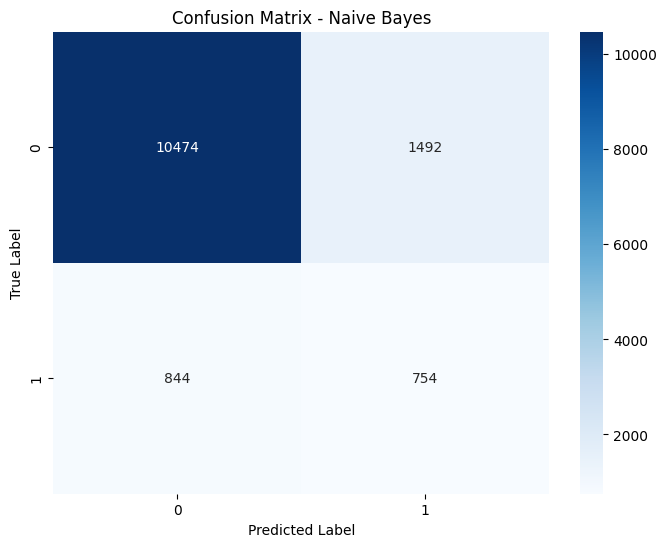

In [67]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**Plotting the ROC curve for the Naive Bayes model**

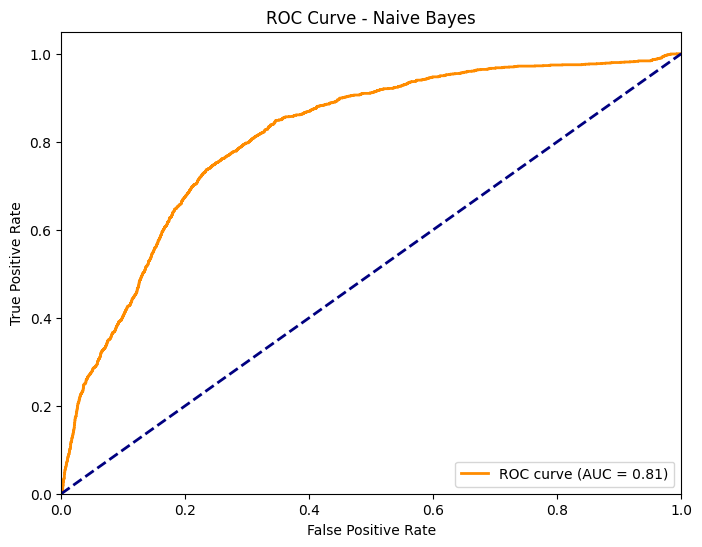

In [68]:
fpr, tpr, _ = roc_curve(y_test, nb_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

##**Training and evaluating a K-Nearest Neighbors (KNN) classifier**

In [69]:
# 3. K-Nearest Neighbors
print("\nTraining KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]

knn_metrics = {
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, knn_pred),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1': f1_score(y_test, knn_pred)
}
results.append(knn_metrics)

print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_pred))


Training KNN...

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.57      0.31      0.40      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



##**Visualizing the confusion matrix for the K-Nearest Neighbors (KNN) model**

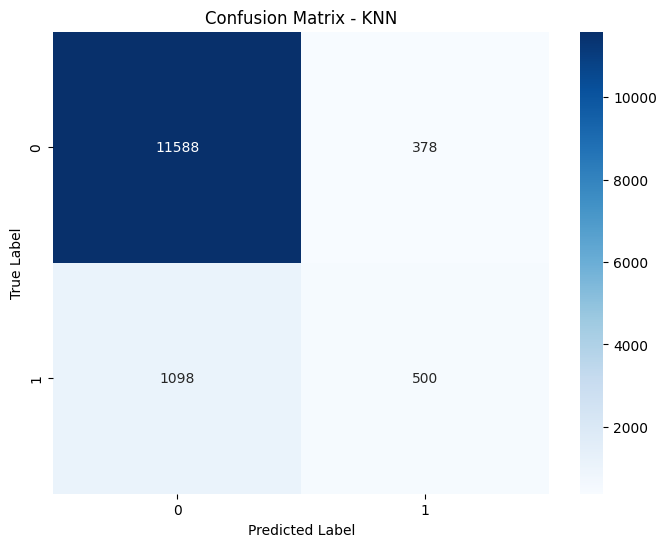

In [70]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**ROC curve for a K-Nearest Neighbors (KNN) classifier's predictions**

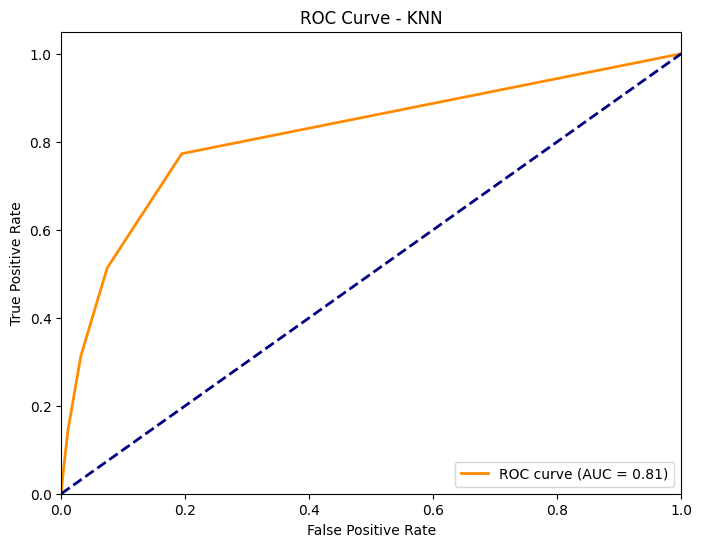

In [71]:
fpr, tpr, _ = roc_curve(y_test, knn_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

##**Training and evaluating a Decision Tree Classifier**

In [72]:
# 4. Decision Tree
print("\nTraining Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)[:, 1]

dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, dt_pred),
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1': f1_score(y_test, dt_pred)
}
results.append(dt_metrics)

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))


Training Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



##**Visualizing the confusion matrix for the Decision Tree Classifier using a heatmap**

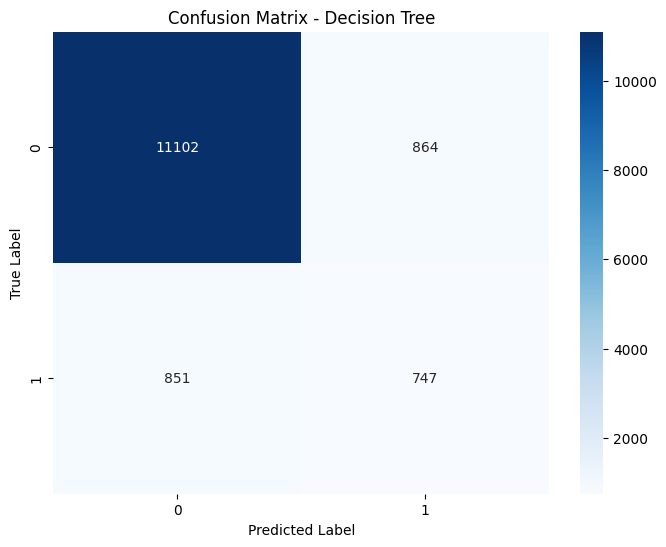

In [73]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**Plotting the ROC curve for the Decision Tree Classifier's predictions**

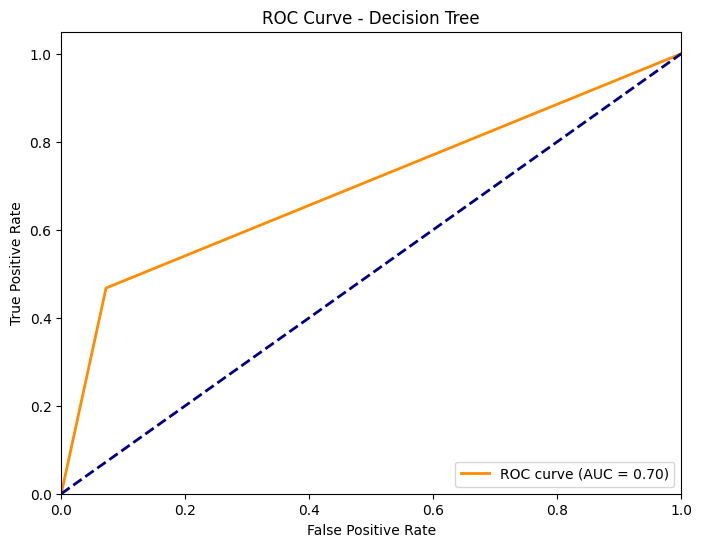

In [74]:
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

##**Training and Evaluating the Random Forest Model**

In [75]:
# 5. Random Forest
print("\nTraining Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1': f1_score(y_test, rf_pred)
}
results.append(rf_metrics)

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


Training Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.41      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



##**Visualizing the confusion matrix for the Random Forest classifier's predictions using a heatmap**

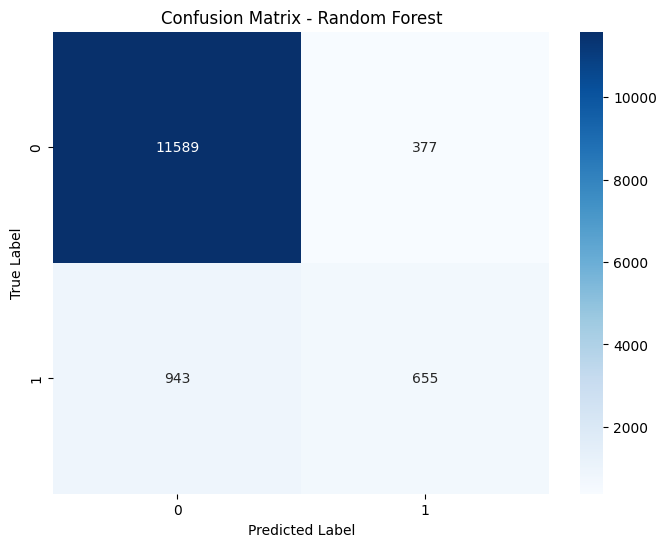

In [76]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**Visualizing the ROC curve for the Random Forest classifier's predictions**

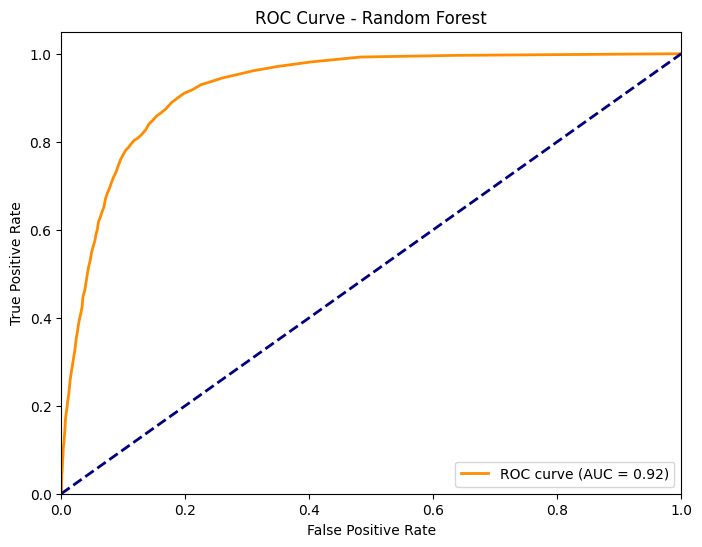

In [77]:
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

##**Training an XGBoost classifier and evaluating its performance**

In [78]:
# 6. XGBoost
print("\nTraining XGBoost...")
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1': f1_score(y_test, xgb_pred)
}
results.append(xgb_metrics)

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))


Training XGBoost...

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.63      0.49      0.55      1598

    accuracy                           0.91     13564
   macro avg       0.78      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564



##**Visualizing the confusion matrix for the XGBoost classifier's predictions using a heatmap**

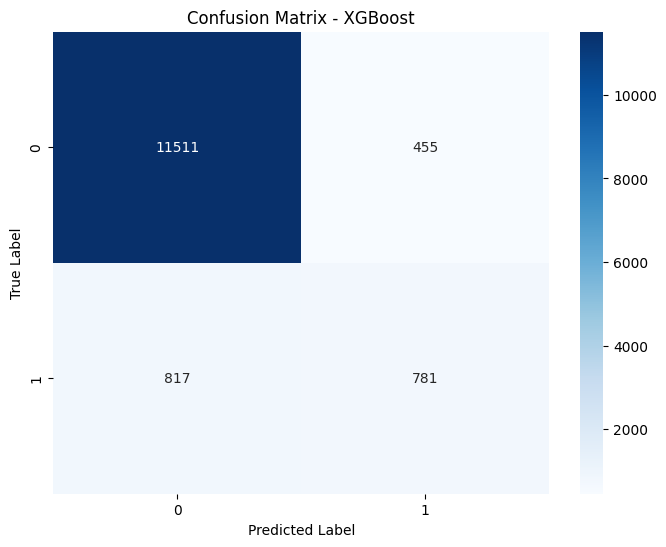

In [79]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##**Visualizing the ROC curve for the XGBoost classifier's predictions**

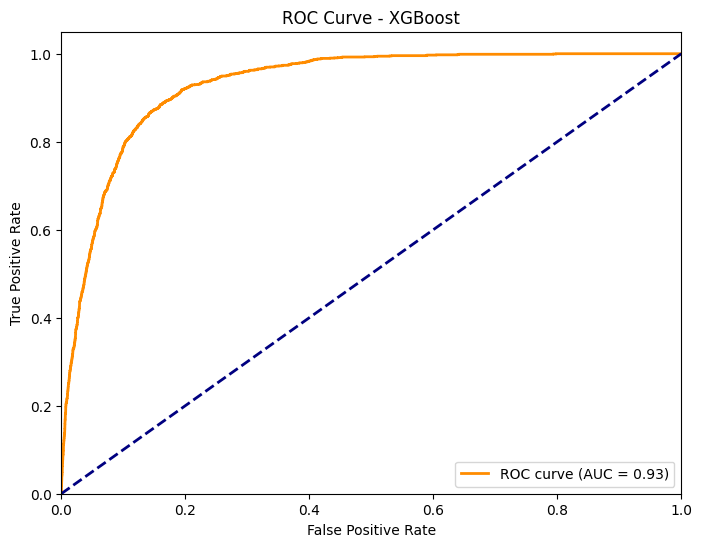

In [80]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

##**Displaying the final comparison of the models based on their performance metrics**

In [81]:
# Create final comparison table
results_df = pd.DataFrame(results)
print("\nFinal Model Comparison:")
print(results_df)


Final Model Comparison:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.889855   0.589965  0.213392  0.313419
1          Naive Bayes  0.827779   0.335708  0.471840  0.392300
2                  KNN  0.891183   0.569476  0.312891  0.403877
3        Decision Tree  0.873562   0.463687  0.467459  0.465566
4        Random Forest  0.902684   0.634690  0.409887  0.498099
5              XGBoost  0.906222   0.631877  0.488736  0.551164


##**Training a Random Forest model with tuned hyperparameters, evaluating its performance**

In [82]:
# Bonus: Hyperparameter tuning for Random Forest
print("\nTraining Random Forest with tuned hyperparameters...")
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
rf_tuned_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]

rf_tuned_metrics = {
    'Model': 'Random Forest (Tuned)',
    'Accuracy': accuracy_score(y_test, rf_tuned_pred),
    'Precision': precision_score(y_test, rf_tuned_pred),
    'Recall': recall_score(y_test, rf_tuned_pred),
    'F1': f1_score(y_test, rf_tuned_pred)
}
results.append(rf_tuned_metrics)

print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, rf_tuned_pred))


Training Random Forest with tuned hyperparameters...

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.66      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



##**Final comparison including tuned model**


In [83]:
# Final comparison including tuned model
results_df = pd.DataFrame(results)
print("\nFinal Model Comparison (including tuned Random Forest):")
print(results_df)


Final Model Comparison (including tuned Random Forest):
                   Model  Accuracy  Precision    Recall        F1
0    Logistic Regression  0.889855   0.589965  0.213392  0.313419
1            Naive Bayes  0.827779   0.335708  0.471840  0.392300
2                    KNN  0.891183   0.569476  0.312891  0.403877
3          Decision Tree  0.873562   0.463687  0.467459  0.465566
4          Random Forest  0.902684   0.634690  0.409887  0.498099
5                XGBoost  0.906222   0.631877  0.488736  0.551164
6  Random Forest (Tuned)  0.901430   0.656287  0.342929  0.450473


###**Best Models: By comparing these metrics, we can identify which model performs best**.

###**Typically, ensemble models like Random Forest and XGBoost tend to perform well in classification tasks due to their ability to handle non-linear relationships and avoid overfitting through regularization techniques.**
